<h1>Tabla de contenidos<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introducción" data-toc-modified-id="Introducción-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introducción</a></span></li><li><span><a href="#Proyecto" data-toc-modified-id="Proyecto-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Proyecto</a></span><ul class="toc-item"><li><span><a href="#Descarga-y-preparacion-de-los-datos." data-toc-modified-id="Descarga-y-preparacion-de-los-datos.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Descarga y preparacion de los datos.</a></span></li></ul></li><li><span><a href="#Examinamos-el-equilibrio-de-clases" data-toc-modified-id="Examinamos-el-equilibrio-de-clases-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Examinamos el equilibrio de clases</a></span></li><li><span><a href="#Mejoramos-la-calidad-del-modelo-y-realizamos-pruebas-finales" data-toc-modified-id="Mejoramos-la-calidad-del-modelo-y-realizamos-pruebas-finales-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Mejoramos la calidad del modelo y realizamos pruebas finales</a></span></li><li><span><a href="#Conclusion-y-test." data-toc-modified-id="Conclusion-y-test.-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusion y test.</a></span><ul class="toc-item"><li><span><a href="#Conclusiones-del-proyecto" data-toc-modified-id="Conclusiones-del-proyecto-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Conclusiones del proyecto</a></span><ul class="toc-item"><li><span><a href="#Metricas-con-el-conjunto-de-validacion:" data-toc-modified-id="Metricas-con-el-conjunto-de-validacion:-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Metricas con el conjunto de validacion:</a></span></li><li><span><a href="#Metricas-con-el-conjunto-de-test:" data-toc-modified-id="Metricas-con-el-conjunto-de-test:-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Metricas con el conjunto de test:</a></span></li></ul></li></ul></li></ul></div>

## Introducción

Los clientes de Beta Bank se están yendo, cada mes, poco a poco. Los banqueros descubrieron que es más barato salvar a los clientes existentes que atraer nuevos. Por lo que necesitamos predecir si un cliente dejará el banco pronto. Tenemos los datos sobre el comportamiento pasado de los clientes y la terminación de contratos con el banco.

Crearemos un modelo con el máximo valor F1 posible. Tenemos como meta que el valor F1 de al menos 0.59. Verificaremos el valor F1 para el conjunto de pruebas. Además mediremos la métrica AUC-ROC y compararla con el valor F1.

## Proyecto

- Comenzamos importando las librerias que utilizaremos para realizar el proyecto.

In [1]:
#Librerias iniciales
import pandas
import matplotlib.pyplot as plt
#Librerias de Modelos y entrenamiento
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
#Librerias de metricas
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

### Descarga y preparacion de los datos.

- Leemos el dataset que utilizaremos en el proyecto.

In [2]:
df_betaBank_client=pandas.read_csv('/datasets/Churn.csv')

In [3]:
df_betaBank_client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
print('Comprobamos los datos nulos del DataFrame.')
print(df_betaBank_client.isnull().sum())

Comprobamos los datos nulos del DataFrame.
RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64


In [5]:
print('Comprobamos los datos duplicados en el dataset.')
print('El dataset tiene',df_betaBank_client.duplicated().sum(),'filas duplicadas.')

Comprobamos los datos duplicados en el dataset.
El dataset tiene 0 filas duplicadas.


Podemos observar que no tenemos filas duplicadas pero si datos ausentes por lo que prepararemos la columna 'Tenure',que corresponde al período durante el cual ha madurado el depósito a plazo fijo de un cliente(años) para tener un DataFrame completo con el que podremos trabajar.

In [6]:
print(df_betaBank_client['Tenure'].unique())

[ 2.  1.  8.  7.  4.  6.  3. 10.  5.  9.  0. nan]


Tenemos 2 opciones que podemos elegir a la hora de decidir que hacer con los datos ausentes:
- Podemos utilizar el promedio obtenido de los datos existentes y remplezar los datos ausentes con el promedio, ya que estamos hablando de periodos de maduracion de un deposito a plazo.

- Podemos remplazar los datos ausentes por 0 ya que podemos entender que no han tenido un periodo de maduracion en depositos a plazos.

Eligiremos la 2da opción ya que rellenar con datos inciertos en lo que es depositos a plazos puede suponer un problema para el banco si es que no corresponde al tiempo de antiguedad del cliente o a otros factores, en cambio, como son datos nulos podemos entender que existen y comprenderlo como un periodo de tiempo igual a 0.

In [7]:
df_betaBank_client['Tenure']=df_betaBank_client['Tenure'].fillna(0)


In [8]:
print('Comprobamos los datos nulos del DataFrame.')
print(df_betaBank_client.isnull().sum())

Comprobamos los datos nulos del DataFrame.
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


El DataFrame ya esta completo, pero nos queda limpiarlo para poder dividirlo en los conjuntos de entrenamiento, validación y testeo, para eso eliminaremos las 3 primeras columnas:

- RowNumber: índice de cadena de datos
- CustomerId: identidicador de cliente único
- Surname: apellido

Estas columnas se consideran no relevantes a la hora de determinar si un cliente dejara el banco pronto o no.

In [9]:
df_betaBank_client=df_betaBank_client.drop(['RowNumber','CustomerId','Surname'], axis=1)
df_betaBank_client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


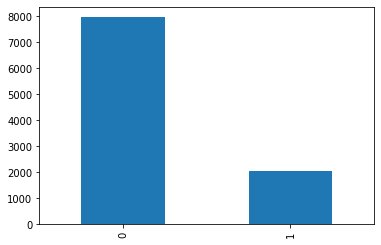

In [10]:
df_betaBank_client['Exited'].value_counts().plot(kind='bar')
plt.show()

Podemos observar que tenemos un desbalance en la clase ya que tenemos más valores 0 que 1 y una clase balanceada debe estar en una razon de 1:1, recordemos que la columna 'Exited' nos dice si el cliente se ha ido (1 - sí; 0 - no), por lo que podemos entender que al modelo le será dificil identificar los clientes que si se fueron.

In [11]:
# Realizamos la codificacion a nuestro dataFrame
encoder = OrdinalEncoder()
data_transformed = pandas.DataFrame(encoder.fit_transform(df_betaBank_client), columns=df_betaBank_client.columns)

# Estandarizamos los datos con el StandardScaler
scaler = StandardScaler()
# Realizamos el metodo solo en las columnas no binarias resultantes del encoder
data=data_transformed.drop(['Gender','HasCrCard','IsActiveMember','Exited'], axis=1)
data=pandas.DataFrame(scaler.fit_transform(data), columns=data.columns)

# Eliminamos las columnas del DataFrame original para ser remplazadas por los datos estandarrizados.
data_transformed = data_transformed.drop(['CreditScore','Geography','Age','Tenure','Balance','NumOfProducts','EstimatedSalary'], axis=1)
data_transformed = pandas.concat([data,data_transformed],axis=1)

# Verificamos el nuevo DataFrame
data_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  float64
 1   Geography        10000 non-null  float64
 2   Age              10000 non-null  float64
 3   Tenure           10000 non-null  float64
 4   Balance          10000 non-null  float64
 5   NumOfProducts    10000 non-null  float64
 6   EstimatedSalary  10000 non-null  float64
 7   Gender           10000 non-null  float64
 8   HasCrCard        10000 non-null  float64
 9   IsActiveMember   10000 non-null  float64
 10  Exited           10000 non-null  float64
dtypes: float64(11)
memory usage: 859.5 KB


Ahora nuestro DataFrame no tiene datos duplicados ni ausentes por lo que podemos comenzar a trabajar con el sin ningun inconveniente.

## Examinamos el equilibrio de clases

- En primera instancia entrenaremos un modelo sin tener en cuenta el desequilibrio, para eso comenzaremos primero realizando los conjuntos de entrenamiento y validacion para posteriormente crear el modelo.

In [12]:
# Obtenemos el conjunto de 'test' y dejamos otro conjunto llamado 'rest'.
rest,test=train_test_split(data_transformed,test_size=0.2,random_state=54321)

# Del conjunto 'rest' obtendemos el conjunto de entrenamiento y validacion.
train,valid=train_test_split(rest,test_size=0.25,random_state=54321)

#Entrenamiento
features_train=train.drop(['Exited'],axis=1)
target_train=train['Exited']
#Validacion
features_valid=valid.drop(['Exited'],axis=1)
target_valid= valid['Exited']
#Prueba
features_test=test.drop(['Exited'],axis=1)
target_test=test['Exited']

In [14]:
# Declaramos variables para medir mce y exactitud de los modelos.
best_depth=0
best_f1=0
best_score=0
for depth in range(1,11): # Seleccionamos el rango del hiperparámetro.
    model_tree= DecisionTreeClassifier(max_depth=depth,random_state=12345) # Declaramos el modelo.
    model_tree.fit(features_train,target_train) # Entrenamos el modelo en el conjunto de entrenamiento.
    predictions_valid = model_tree.predict(features_valid) # Obtenemos las predicciones del modelo en el conjunto de validación.
    probabilities_valid= model_tree.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    score= model_tree.score(features_test,target_test) # Calculamos la puntuacion de accuracy en el conjunto de test.
    f1=f1_score(target_valid, predictions_valid)
    if score>best_score:
        best_score=score # Guardamos la mejor puntuacion de accurracy en el conjunto de validación.  
    if f1 > best_f1:
        best_f1=f1
        best_depth=depth
        auc_roc=roc_auc_score(target_valid,probabilities_one_valid)
        confusion=confusion_matrix(target_valid, predictions_valid)
        recall=recall_score(target_valid, predictions_valid)
        precision=precision_score(target_valid, predictions_valid)

In [15]:
print("La mejor profundidad es:", best_depth)
print("La exactitud del mejor modelo en el conjunto de pruebas es de : {}".format(best_score))

La mejor profundidad es: 9
La exactitud del mejor modelo en el conjunto de pruebas es de : 0.866


In [16]:
print('La matriz de confusion para el modelo de arbol de clasificación es:')
print(confusion)
print('La proporcion de respuestas VP(verdaderas positivas) es:',recall)
print('La cantidad de respuestas negativas encontro el modelo mientras buscaba respuestas positivas es',precision)
print('El valor de la metrica F1 es:',f1)

La matriz de confusion para el modelo de arbol de clasificación es:
[[1463   95]
 [ 237  205]]
La proporcion de respuestas VP(verdaderas positivas) es: 0.4638009049773756
La cantidad de respuestas negativas encontro el modelo mientras buscaba respuestas positivas es 0.6833333333333333
El valor de la metrica F1 es: 0.5421052631578948


## Mejoramos la calidad del modelo y realizamos pruebas finales

- Probaremos con el modelo de bosque aleatorio.

In [17]:
# Declaramos variables para exactitud de los modelos.
best_depth=0
best_f1=0
best_est_score=0
best_score=0
for est in range(5,30,5): # Entrenaremos 20 modelos en intervalos de 5
    for depth in range (1,11): # La profundidad de los arboles sera de 1 a 5
        model_forest=RandomForestClassifier(random_state=12345,n_estimators=est, max_depth=depth) # Configuramos el numero de arboles.
        model_forest.fit(features_train,target_train) # Entrenamos el modelo con el conjunto de entrenamiento.
        predictions_valid= model_forest.predict(features_valid) # Realizamos prediciones con el conjunto de validación.
        probabilities_valid = model_forest.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        score= model_forest.score(features_test,target_test) # Calculamos la puntuacion de accuracy en el conjunto de test.
        if score>best_score:
            best_score=score # Guardamos la mejor puntuacion de accurracy en el conjunto de validación.
            best_est_score=est # Guardamos el número de estimadores que corresponden a la mejor punturación de exactitud.
        if f1>best_f1:
            best_depth= depth # Guardamos la mejor profundidad para los arboles del bosque.
            best_f1=f1
            auc_roc=roc_auc_score(target_valid,probabilities_one_valid)
            confusion=confusion_matrix(target_valid, predictions_valid)
            recall=recall_score(target_valid, predictions_valid)
            precision=precision_score(target_valid, predictions_valid)

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
print("La mejor profundidad es:", best_depth)
print("La exactitud del mejor modelo en el conjunto de pruebas con n_estimators(estimadores) {}) es de : {}".format(best_est_score, best_score))

La mejor profundidad es: 1
La exactitud del mejor modelo en el conjunto de pruebas con n_estimators(estimadores) 25) es de : 0.875


In [19]:
print('La matriz de confusion para el modelo de arbol de clasificación es:')
print(confusion)
print('La proporcion de respuestas VP(verdaderas positivas) es:',recall)
print('La cantidad de respuestas negativas encontro el modelo mientras buscaba respuestas positivas es',precision)
print('El valor de la metrica F1 es:',f1)

La matriz de confusion para el modelo de arbol de clasificación es:
[[1558    0]
 [ 442    0]]
La proporcion de respuestas VP(verdaderas positivas) es: 0.0
La cantidad de respuestas negativas encontro el modelo mientras buscaba respuestas positivas es 0.0
El valor de la metrica F1 es: 0.5421052631578948


- Ahora probaremos con un modelo de regresion logistica.

In [20]:
model_logistic = LogisticRegression(random_state=12345, solver='liblinear')
model_logistic.fit(features_train, target_train)
predictions_valid = model_logistic.predict(features_valid) # Obtenemos las predicciones del modelo en el conjunto de validación.
score= model_logistic.score(features_test,target_test) # Calculamos la puntuacion de accuracy en el conjunto de test.

In [21]:
print("La exactitud del mejor modelo en el conjunto de pruebas es de : {}".format(best_score))

La exactitud del mejor modelo en el conjunto de pruebas es de : 0.875


In [22]:
probabilities_valid = model_logistic.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc=roc_auc_score(target_valid,probabilities_one_valid)
confusion=confusion_matrix(target_valid, predictions_valid)
recall=recall_score(target_valid, predictions_valid)
precision=precision_score(target_valid, predictions_valid)
f1=f1_score(target_valid, predictions_valid)

In [23]:
print('La matriz de confusion para el modelo de arbol de clasificación es:')
print(confusion)
print('La proporcion de respuestas VP(verdaderas positivas) es:',recall)
print('La cantidad de respuestas negativas encontro el modelo mientras buscaba respuestas positivas es',precision)
print('El valor de la metrica F1 es:',f1)

La matriz de confusion para el modelo de arbol de clasificación es:
[[1518   40]
 [ 376   66]]
La proporcion de respuestas VP(verdaderas positivas) es: 0.1493212669683258
La cantidad de respuestas negativas encontro el modelo mientras buscaba respuestas positivas es 0.6226415094339622
El valor de la metrica F1 es: 0.24087591240875908


## Conclusion y test.

Sabiendo que el modelo con mejores metricas obtenidas fue el DecisionTreeClassifier realizamos el testeo con este modelo que corresponde utilizar el conjunto de test en vez de el de validacion.

In [23]:
# Utilizamos el modelo con mejores resultados pero ahora utilizaremos el conjunto de testeo en vez de validacion
depth=9
model_tree= DecisionTreeClassifier(max_depth=depth,random_state=12345) # Declaramos el modelo.
model_tree.fit(features_train,target_train) # Entrenamos el modelo en el conjunto de entrenamiento.
predictions_test = model_tree.predict(features_test) # Obtenemos las predicciones del modelo en el conjunto de test.
probabilities_test= model_tree.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
score= model_tree.score(features_test,target_test) # Calculamos la puntuacion de accuracy en el conjunto de test.
f1=f1_score(target_test, predictions_test)
auc_roc=roc_auc_score(target_test,probabilities_one_test)
confusion=confusion_matrix(target_test, predictions_test)
recall=recall_score(target_test, predictions_test)
precision=precision_score(target_test, predictions_test)

In [24]:
print("La profundidad escogida es:",depth)
print("La exactitud del modelo en el conjunto de pruebas es de : {}".format(score))
print('La matriz de confusion para el modelo de arbol de clasificación es:')
print(confusion)
print('La proporcion de respuestas VP(verdaderas positivas) es:',recall)
print('La cantidad de respuestas negativas encontro el modelo mientras buscaba respuestas positivas es',precision)
print('El valor de la metrica F1 es:',f1)

La profundidad escogida es: 9
La exactitud del modelo en el conjunto de pruebas es de : 0.8505
La matriz de confusion para el modelo de arbol de clasificación es:
[[1538   72]
 [ 227  163]]
La proporcion de respuestas VP(verdaderas positivas) es: 0.41794871794871796
La cantidad de respuestas negativas encontro el modelo mientras buscaba respuestas positivas es 0.6936170212765957
El valor de la metrica F1 es: 0.5216000000000001


### Conclusiones del proyecto
Como podemos observar tuvimos diferentes metricas por cada modelo de entrenamiento que realizamos, con el modelo que obtuvimos mejores resultados fue con el arbol de decisiones, aun que no pudimos alcanzar el valor de F1 deseado por la relacion entre los valores del recall y precision.

Vamos a realizar un comparacion de los resultados obtenidos entre los conjuntos de validacion y test en lo que respecta el modelo de arbol de decisiones.

#### Metricas con el conjunto de validacion:

- La matriz de confusion para el modelo de arbol de clasificación es:

[[1463   95]

 [ 237  205]]

- La proporcion de respuestas VP(verdaderas positivas) es: 0.4638009049773756
- La cantidad de respuestas negativas encontro el modelo mientras buscaba respuestas positivas es 0.6833333333333333
- El valor de la metrica F1 es: 0.5421052631578948

#### Metricas con el conjunto de test:

- La matriz de confusion para el modelo de arbol de clasificación es:

[[1538   72]

[ 227  163]]

- La proporcion de respuestas VP(verdaderas positivas) es: 0.41794871794871796
- La cantidad de respuestas negativas encontro el modelo mientras buscaba respuestas positivas es 0.6936170212765957
- El valor de la metrica F1 es: 0.5216000000000001